In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('netflix_titles.csv')
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,24-Sep-21,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,24-Sep-21,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
# examining null values. additionally ascertain the number of empty values throughout the dataset.
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
# Eliminates every null value. In essence, eliminate already all rows with null values, and give the clean dataset the name data_cleaned.
data_cleaned = data.dropna()

In [5]:
data_cleaned.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
# After the clean rows, count the number of rows that are left.
data_cleaned.count()

show_id         5332
type            5332
title           5332
director        5332
cast            5332
country         5332
date_added      5332
release_year    5332
rating          5332
duration        5332
listed_in       5332
description     5332
dtype: int64

In [7]:
net_movie = data_cleaned.loc[data_cleaned.type=='Movie',:].reset_index()
net_movie.title = net_movie.title.str.lower()
net_movie['index'] = net_movie.index
net_movie.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,1,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-Sep-21,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,2,s13,Movie,je suis karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",23-Sep-21,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
3,3,s25,Movie,jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-Sep-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
4,4,s28,Movie,grown ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,20-Sep-21,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...


In [8]:
tv_shows = data_cleaned.loc[data_cleaned.type=='TV Show',:].reset_index()
tv_shows.title = tv_shows.title.str.lower()
tv_shows['index'] = tv_shows.index
tv_shows.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s9,TV Show,the great british baking show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
1,1,s199,TV Show,king of boys: the return of the king,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,27-Aug-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
2,2,s274,TV Show,gone for good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,13-Aug-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
3,3,s277,TV Show,valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,13-Aug-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
4,4,s298,TV Show,navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,6-Aug-21,2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."


In [9]:
net_movie.duplicated().sum()

0

In [10]:
tv_shows.duplicated().sum()

0

EDA

In [11]:
# getting index of tv_shows
index = tv_shows.index
number_of_rows_tv = len(index)

In [12]:
number_of_rows_tv

147

In [13]:
# getting index of movies
index = net_movie.index
number_of_rows_movie = len(index)
number_of_rows_movie

5185

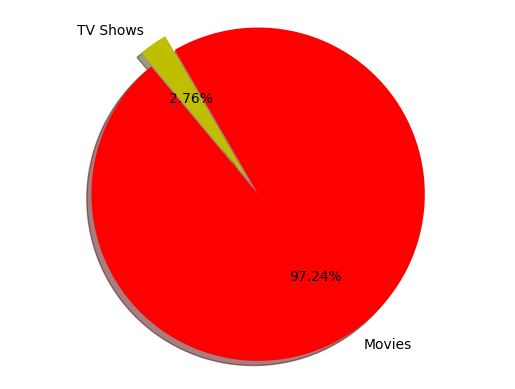

In [14]:
# plotting pie chart of tv shows and movies
color = ['y', 'r']
label = 'TV Shows', 'Movies'
sizes = [number_of_rows_tv, number_of_rows_movie]
explode=(0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode,labels=label,colors=color,autopct='%2.2f%%',shadow=True,startangle=120)
ax1.axis('equal')
plt.show()

List of latest 15 movies

In [15]:
top_15=net_movie.sort_values(by='release_year',ascending=False).head(15)
top_15[['title','release_year']]

,title,release_year
526,7 yards: the chris norton story,2021
274,the seventh day,2021
122,the kissing booth 3,2021
125,slay,2021
126,the paper tigers,2021
128,the swarm,2021
129,vivo,2021
132,lady boss: the jackie collins story,2021
700,what happened to mr. cha?,2021
135,aftermath,2021


List of 20 latest tv shows

In [16]:
top_20 = tv_shows.sort_values(by='release_year',ascending=False).head(20)
top_20[['title','release_year']]

,title,release_year
0,the great british baking show,2021
1,king of boys: the return of the king,2021
21,pitta kathalu,2021
20,dealer,2021
19,men on a mission,2021
16,let's fight ghost,2021
15,halston,2021
13,feel good,2021
24,the idhun chronicles,2021
12,trese,2021


Count of movies and tv shows by country

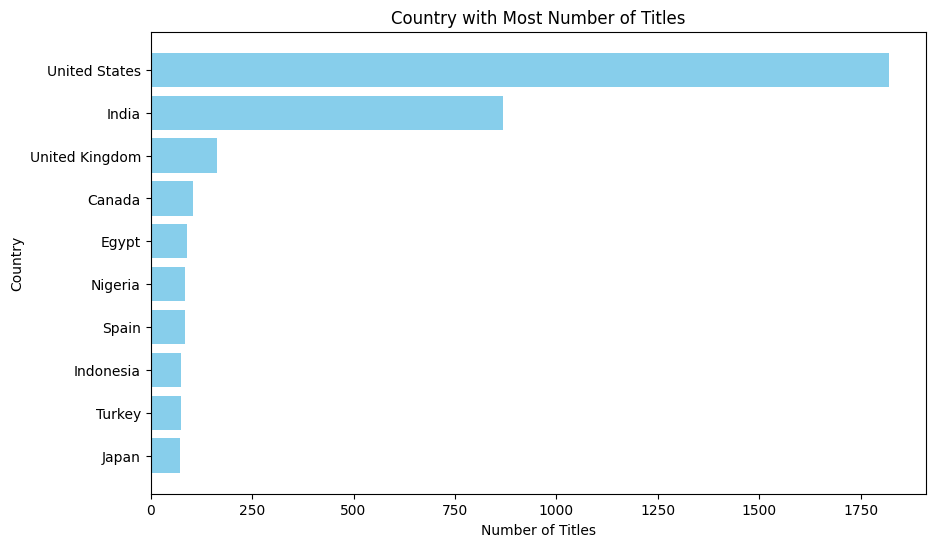

In [17]:
top_country = net_movie['country'].value_counts().rename_axis('Country').reset_index(name='counts')[:10]
plt.figure(figsize=(10, 6))
plt.barh(top_country['Country'], top_country['counts'], color='skyblue')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Country with Most Number of Titles')
plt.gca().invert_yaxis()
plt.show()

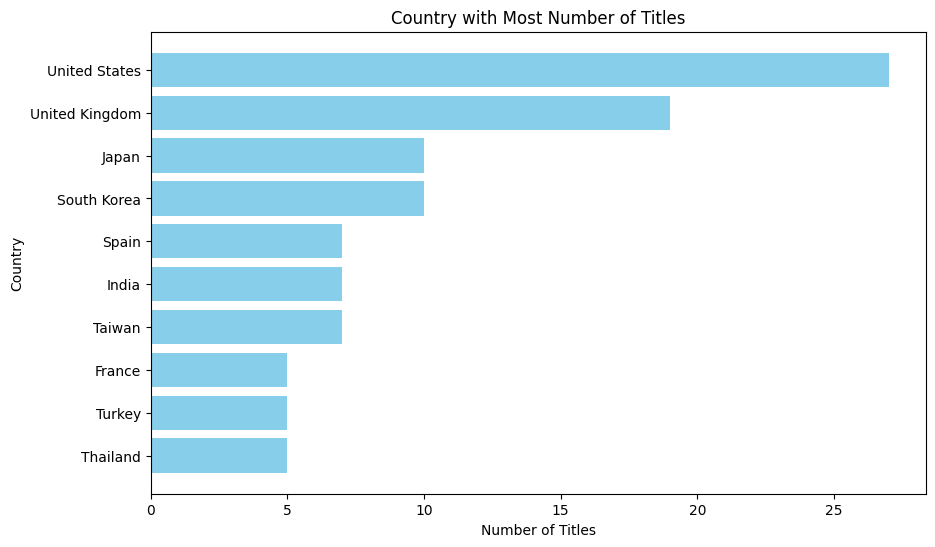

In [18]:
top_country = tv_shows['country'].value_counts().rename_axis('Country').reset_index(name='counts')[:10]
plt.figure(figsize=(10, 6))
plt.barh(top_country['Country'], top_country['counts'], color='skyblue')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.title('Country with Most Number of Titles')
plt.gca().invert_yaxis()
plt.show()

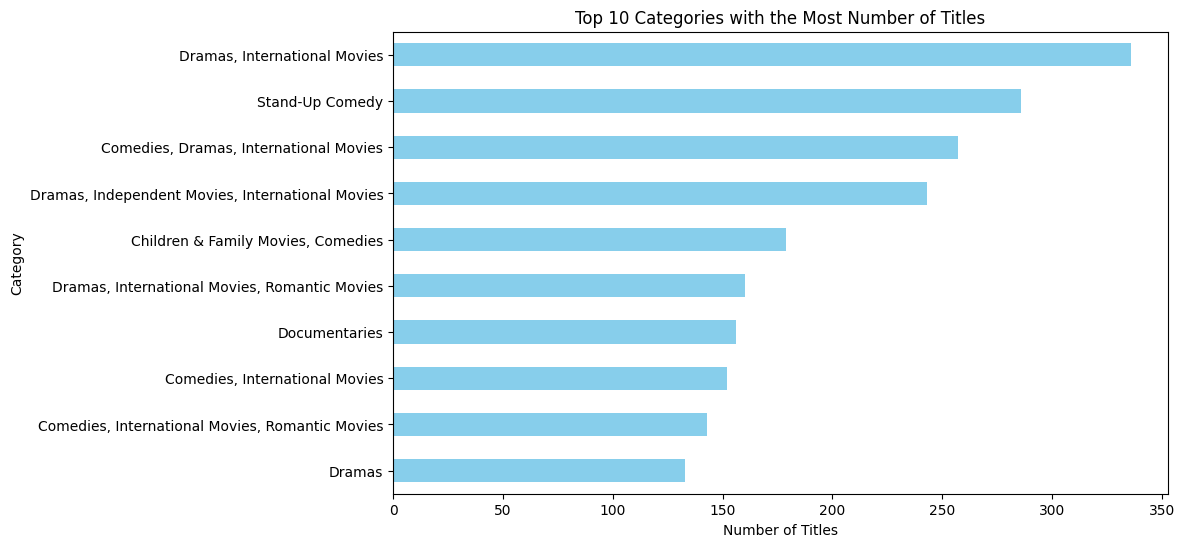

In [19]:
# Assuming you have a DataFrame 'net_movie' with columns 'listed_in' and 'type'
newdata = net_movie.copy() # Make a copy to avoid modifying the orginal DataFrame
category = newdata['listed_in'].value_counts().head(10)

plt.figure(figsize=(10, 6))
category.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Titles')
plt.ylabel('Category')
plt.title('Top 10 Categories with the Most Number of Titles')
plt.gca().invert_yaxis()
plt.show()

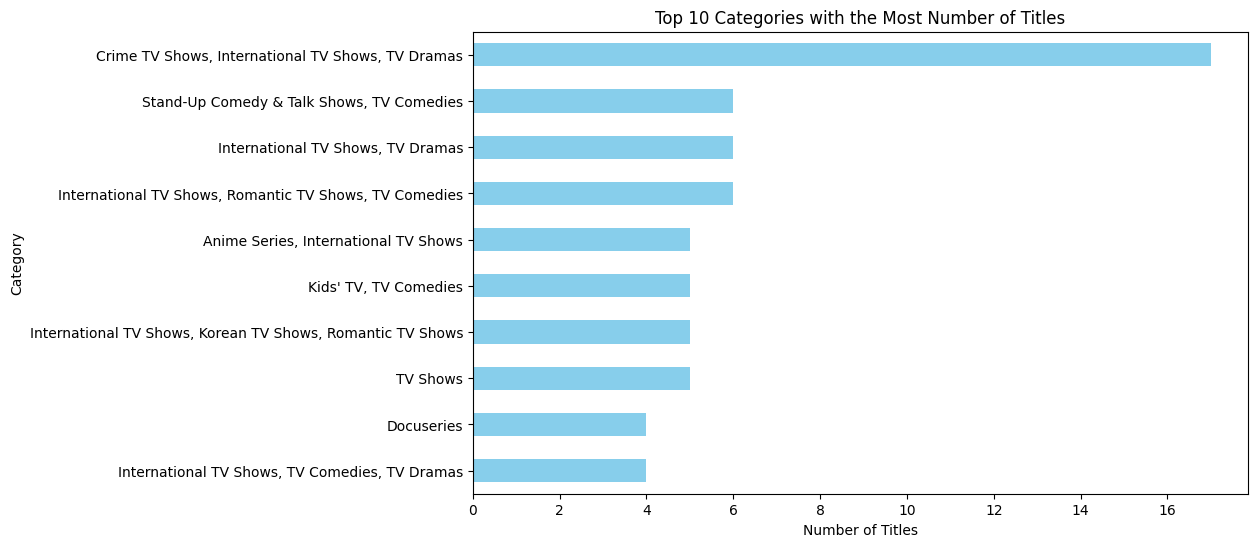

In [20]:
# Assuming you have a DataFrame 'net_movie' with columns 'listed_in' and 'type'
newdata = tv_shows.copy() # Make a copy to avoid modifying the orginal DataFrame
category = newdata['listed_in'].value_counts().head(10)

plt.figure(figsize=(10, 6))
category.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Titles')
plt.ylabel('Category')
plt.title('Top 10 Categories with the Most Number of Titles')
plt.gca().invert_yaxis()
plt.show()

Duration of top 20 movies with respect to their countries

In [21]:
net_movie['time'] = net_movie['duration'].str.split(' ', expand=True)[0] # split on ' ' (space)
net_movie['time'] = pd.to_numeric(net_movie['time'], errors='coerce') # convert to numeric, set error='coerce' to handle empty strings
net_movie['screenplay'] = net_movie['time'] / 60 # convert to hours

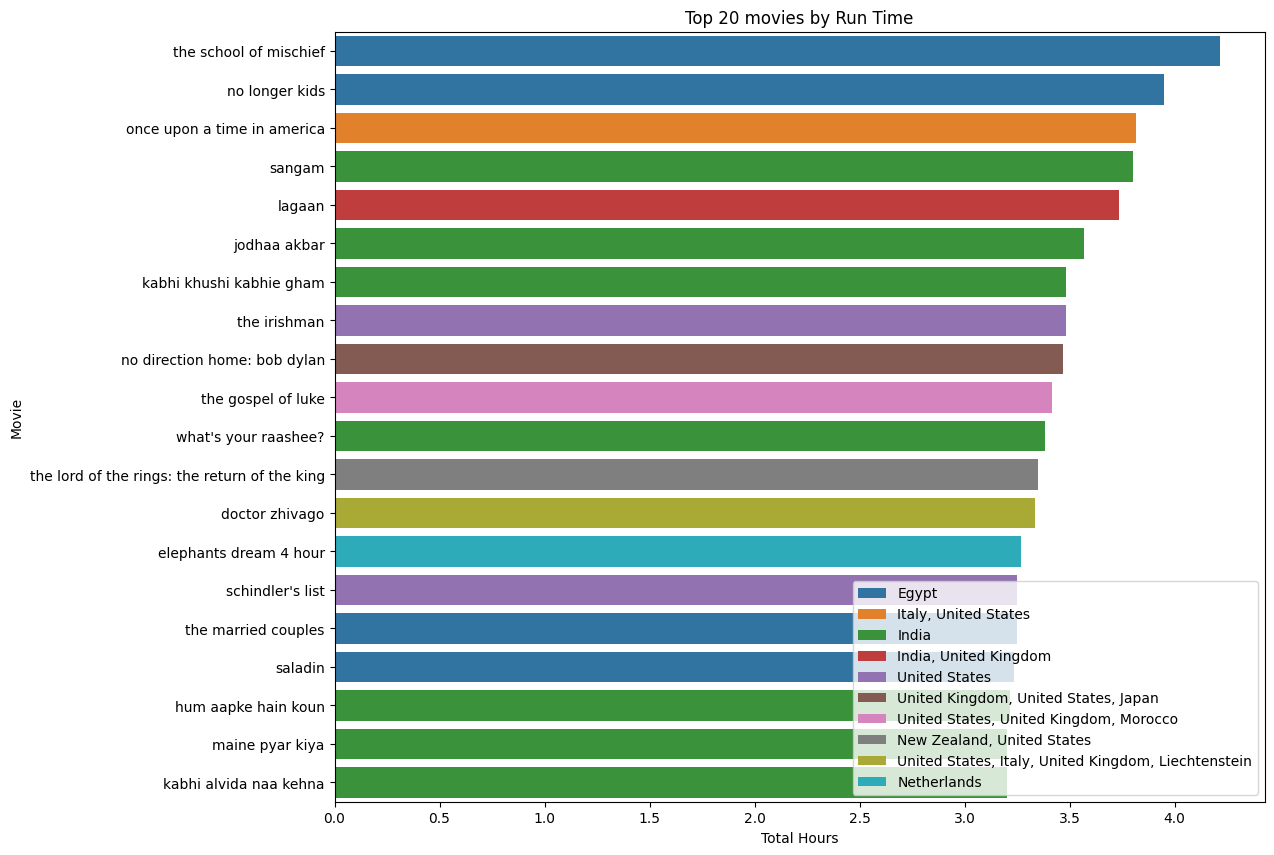

In [22]:
top_20 = net_movie.sort_values(by = 'screenplay', ascending=False).head(20)
plt.figure(figsize = (12, 10))
sns.barplot(data= top_20, y = 'title', x = 'screenplay', hue = 'country', dodge = False)
plt.legend(loc= 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('Movie')
plt.title('Top 20 movies by Run Time')
plt.show()

Duration of top 20 tv shows with respect to their countries

In [23]:
# Assuming you have a DataFrame 'tv_shows' with column 'duration'
tv_shows['time'] = tv_shows['duration'].str.split(' ', expand=True)[0] # split on ' ' (space)
tv_shows['time'] = pd.to_numeric(tv_shows['time'], errors='coerce') # covert to numeric, set error='coerce' to handle empty strings
tv_shows['screenplay'] = tv_shows['time'] / 60 # convert to hours

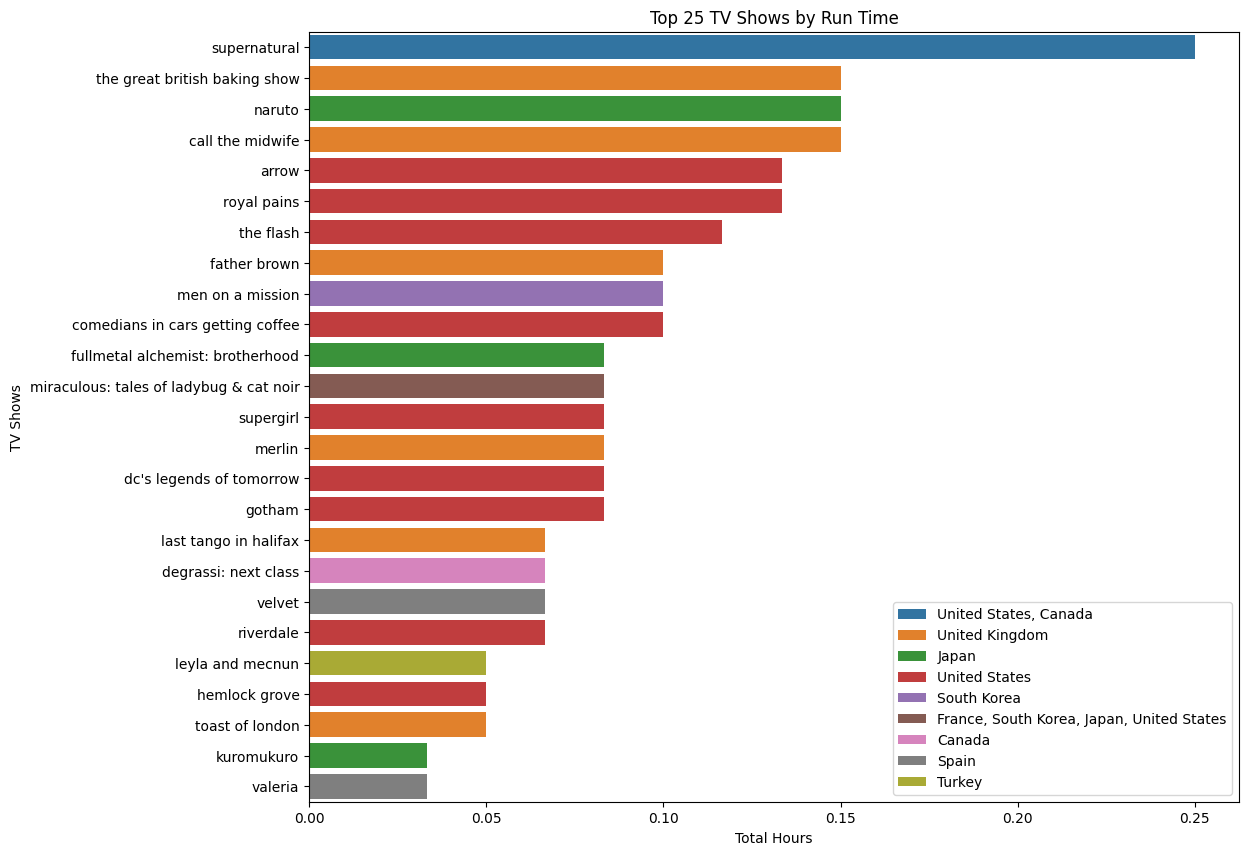

In [24]:
top_25 = tv_shows.sort_values(by = 'screenplay', ascending = False).head(25)
plt.figure(figsize = (12, 10))
sns.barplot(data= top_25, y = 'title', x = 'screenplay', hue='country', dodge = False)
plt.legend(loc = 'lower right')
plt.xlabel('Total Hours')
plt.ylabel('TV Shows')
plt.title('Top 25 TV Shows by Run Time')
plt.show()

In [26]:
net_movie.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'time', 'screenplay'],
      dtype='object')

In [27]:
tv_shows.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'time', 'screenplay'],
      dtype='object')

So we'll gonna select a few features and create a column in a data frame that comines all the selected features into one string:

In [28]:
# Selecting features
features = ['director', 'cast', 'country', 'description', 'listed_in']

So we have a funcation name as create_features to which we give the input of rows and this returns the row of the features. By using the apply method we will transform this funcation to all the rows of the data frame:

In [29]:
# create a column a dataframe which combines all the selected features
for feature in features:
  net_movie[feature] = net_movie[feature].fillna(' ')


def combine_features(row):
  return row['director'] + " " + row['cast'] + " " + row['country'] + " " + row['description'] + " " + row['listed_in']
net_movie['combine_features'] = net_movie.apply(combine_features, axis=1)
print("Combine Feature :", net_movie['combine_features'])

Combine Feature : 0       Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano...
1       Theodore Melfi Melissa McCarthy, Chris O'Dowd,...
2       Christian Schwochow Luna Wedler, Jannis Niewöh...
3       S. Shankar Prashanth, Aishwarya Rai Bachchan, ...
4       Dennis Dugan Adam Sandler, Kevin James, Chris ...
                              ...                        
5180    Majid Al Ansari Ali Suliman, Saleh Bakri, Yasa...
5181    David Fincher Mark Ruffalo, Jake Gyllenhaal, R...
5182    Ruben Fleischer Jesse Eisenberg, Woody Harrels...
5183    Peter Hewitt Tim Allen, Courteney Cox, Chevy C...
5184    Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra...
Name: combine_features, Length: 5185, dtype: object


Now we need to check the similaries between the content for which we create the count metirc and then get the cosin similarity to get the similarity score:

In [30]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(net_movie['combine_features'])
cosine_sim = cosine_similarity(count_matrix)

In [31]:
def title_from_index1(index):
  return net_movie[net_movie.index == index['title']].values()

In [32]:
def title_from_index1(df,index):
  return df[df.index==index]['title'].values[0]

def index_from_title1(df,title):
  return df[df.title==title]['index'].values[0]

In [33]:
def selectmovie(movie_user_likes):
    try:
      movie_user_likes = movie_user_likes.lower()
      movie_index = index_from_title1(net_movie, movie_user_likes)
      similar_movies = list(enumerate(cosine_sim[movie_index]))
      sorted_similar_movies = sorted(similar_movies, key =lambda x:x[1], reverse = True)[1:]
      i = 0
      print("Top 5 similar movies to " + movie_user_likes + " are :\n")
      for element in sorted_similar_movies:
        print(title_from_index1(net_movie, element[0]))
        i=i+1
        if i>=5:
          break

    except:
      print("Movie not found in Netflix")

In [38]:
# print the titile of top 5 similar movies
selectmovie('The starling')

Top 5 similar movies to the starling are :

the lost husband
ram teri ganga maili
i am maris
her only choice
when we first met


In [41]:
import tkinter as tk
from tkinter import messagebox

def select_movie(movie_user_likes):
    try:
        movie_user_likes = movie_user_likes.lower()
        movie_index = index_from_title1(net_movie, movie_user_likes)
        similar_movies = list(enumerate(cosine_sim[movie_index]))
        sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:]
        i = 0
        similar_movie_titles = []
        for element in sorted_similar_movies:
            similar_movie_titles.append(title_from_index1(net_movie, element[0]))
            i += 1
            if i >= 5:
                break
        return similar_movie_titles

    except:
        return "Movie not found in Netflix"

def get_similar_movies():
    movie_title = entry.get()
    similar_movie_titles = select_movie(movie_title)
    messagebox.showinfo("Top 5 Similar Movies", "\n".join(similar_movie_titles))

root = tk.Tk()
root.title("Get Similar Movies")

label = tk.Label(root, text="Enter a movie title:")
label.pack()

entry = tk.Entry(root)
entry.pack()

button = tk.Button(root, text="Get Similar Movies", command=get_similar_movies)
button.pack()

root.mainloop()

In [47]:
import pandas as pd

# Assuming you already have the DataFrame net_movie
# Filter the DataFrame to include only the rows where 'Type' is 'Movie'
movie_titles = net_movie[net_movie['type'] == 'Movie']['title']

# Save the titles to a text file
movie_titles.to_csv('movie_titles.txt', index=False, header=False)


In [49]:
import pandas as pd

# Assuming you already have the DataFrame net_movie
# Filter the DataFrame to include only the rows where 'Type' is 'Movie'
tv_titles = tv_shows[tv_shows['type'] == 'TV Show']['title']

# Save the titles to a text file
tv_titles.to_csv('tv_shows_titles.txt', index=False, header=False)

In [50]:
# create a column a dataframe which combines all the selected features
for feature in features:
  tv_shows[feature] = tv_shows[feature].fillna(' ')


def combine_features(row):
  return row['director'] + " " + row['cast'] + " " + row['country'] + " " + row['description'] + " " + row['listed_in']
tv_shows['combine_features'] = tv_shows.apply(combine_features, axis=1)
print("Combine Feature :", tv_shows['combine_features'])

Combine Feature : 0      Andy Devonshire Mel Giedroyc, Sue Perkins, Mar...
1      Kemi Adetiba Sola Sobowale, Toni Tones, Richar...
2      Juan Carlos Medina Finnegan Oldfield, Nicolas ...
3      Inma Torrente Diana Gómez, Silma López, Paula ...
4      Bejoy Nambiar, Priyadarshan, Karthik Narain, V...
                             ...                        
142    Dheeraj Berry Sanjay Keni, Priya Raina India A...
143    Alastair Fothergill David Attenborough United ...
144    Michael Samuels Peter Mullan, Anastasia Hille,...
145    Mark Tonderai Tom Cullen, O.T. Fagbenle, Lee I...
146    Michael Cumming Matt Berry, Robert Bathurst, D...
Name: combine_features, Length: 147, dtype: object


In [51]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(tv_shows['combine_features'])
cosine_sim_tv = cosine_similarity(count_matrix)

In [52]:
def title_from_index(index):
  return tv_shows[tv_shows.index == index['title']].values()

def title_from_index(df,index):
  return df[df.index==index]['title'].values[0]

def index_from_title(df,title):
  return df[df.title==title]['index'].values[0]

In [53]:
def selecttvshows(tv_show_user_likes):
    try:
        tv_show_user_likes = tv_show_user_likes.lower()
        tv_show_index = index_from_title(tv_shows, tv_show_user_likes)
        similar_tv_shows = list(enumerate(cosine_sim_tv[tv_show_index]))
        sorted_similar_tv_shows = sorted(similar_tv_shows, key=lambda x: x[1], reverse=True)[1:]
        i = 0
        similar_tv_show_titles = []
        for element in sorted_similar_tv_shows:
            similar_tv_show_titles.append(title_from_index(tv_shows, element[0]))
            i += 1
            if i >= 5:
                break
        return similar_tv_show_titles

    except:
        return "TV Show not found in Netflix"

In [54]:
print(selecttvshows('valeria'))

['velvet', 'camelia la texana', 'someone has to die', 'mr. sunshine', 'bolívar']


In [55]:
import tkinter as tk
from tkinter import messagebox

def select_tv_show(tv_show_user_likes):
    try:
        tv_show_user_likes = tv_show_user_likes.lower()
        tv_show_index = index_from_title(tv_shows, tv_show_user_likes)
        similar_tv_shows = list(enumerate(cosine_sim_tv[tv_show_index]))
        sorted_similar_tv_shows = sorted(similar_tv_shows, key=lambda x: x[1], reverse=True)[1:]
        i = 0
        similar_tv_show_titles = []
        for element in sorted_similar_tv_shows:
            similar_tv_show_titles.append(title_from_index(tv_shows, element[0]))
            i += 1
            if i >= 5:
                break
        return similar_tv_show_titles

    except:
        return "TV Show not found in Netflix"

def get_similar_tv_shows():
    tv_show_title = entry.get()
    similar_tv_show_titles = select_tv_show(tv_show_title)
    messagebox.showinfo("Top 5 Similar TV Shows", "\n".join(similar_tv_show_titles))

root = tk.Tk()
root.title("Get Similar TV Shows")

label = tk.Label(root, text="Enter a TV show title:")
label.pack()

entry = tk.Entry(root)
entry.pack()

button = tk.Button(root, text="Get Similar TV Shows", command=get_similar_tv_shows)
button.pack()

root.mainloop()
